In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/top2018 recs.csv')
df.head()

,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,History
0,God's Plan,Drake,0.754,0.449,7,-9.211,1,0.1090,0.0332,0.000083,0.552,0.357,77.169,198973,4,1
1,SAD!,XXXTENTACION,0.740,0.613,8,-4.880,1,0.1450,0.2580,0.003720,0.123,0.473,75.023,166606,4,0
2,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5,-6.090,0,0.0898,0.1170,0.000066,0.131,0.140,159.847,218147,4,0
3,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,8,-8.011,1,0.1170,0.5800,0.000000,0.112,0.439,140.124,221440,4,1
4,In My Feelings,Drake,0.835,0.626,1,-5.833,1,0.1250,0.0589,0.000060,0.396,0.350,91.030,217925,4,1


In [ ]:
import seaborn as sb
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)


In [ ]:
X = df.drop(['name','artists','History'],axis=1) #16-3 = 13 columns
Y = df['History']

In [ ]:
from sklearn import preprocessing

In [ ]:
mms = preprocessing.MinMaxScaler()
xscaler = mms.fit_transform(X)
xscaler

array([[0.70254958, 0.24959217, 0.63636364, ..., 0.09189506, 0.32099562,
        0.5       ],
       [0.68271955, 0.51712887, 0.72727273, ..., 0.07577681, 0.2206182 ,
        0.5       ],
       [0.46600567, 0.38988581, 0.45454545, ..., 0.71287582, 0.38045855,
        0.5       ],
       ...,
       [0.41643059, 0.75693312, 0.        , ..., 0.53152673, 0.51025421,
        1.        ],
       [0.        , 0.23001631, 1.        , ..., 0.86456463, 0.44512844,
        0.5       ],
       [0.41784703, 0.4730832 , 1.        , ..., 0.46379402, 0.31293243,
        0.5       ]])

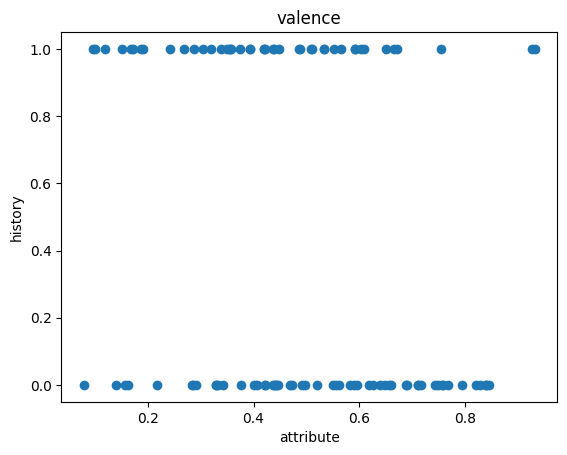

In [ ]:
plt.scatter(X['valence'],Y)
plt.title('valence')
plt.ylabel('history')
plt.xlabel('attribute')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest, ytrain, ytest = train_test_split(xscaler, Y,test_size = 0.3)

In [ ]:
from keras import layers, models, optimizers

In [ ]:
model = models.Sequential([
    
    layers.Dense(13, activation='relu'),
    layers.Dense(13, activation='relu'),
    layers.Dense(13, activation='relu'),

    layers.Dense(13, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])


In [ ]:
model.compile(optimizer = 'adam', loss='binary_crossentropy',metrics = ['accuracy'])

In [ ]:
import tensorflow as tf
xtrain = tf.convert_to_tensor(xtrain)
ytrain = tf.convert_to_tensor(ytrain)


In [ ]:
          batch_size=32, epochs=300,
          validation_data=(xval, yval))

Epoch 1/300
3/3 [==============================] - 0s 165ms/step - loss: 0.5330 - accuracy: 0.8000 - val_loss: 0.6467 - val_accuracy: 0.5333
Epoch 2/300
3/3 [==============================] - 0s 76ms/step - loss: 0.5299 - accuracy: 0.8000 - val_loss: 0.6538 - val_accuracy: 0.6000
Epoch 3/300
3/3 [==============================] - 0s 82ms/step - loss: 0.5295 - accuracy: 0.8000 - val_loss: 0.6672 - val_accuracy: 0.6667
Epoch 4/300
3/3 [==============================] - 0s 58ms/step - loss: 0.5271 - accuracy: 0.8000 - val_loss: 0.6660 - val_accuracy: 0.6667
Epoch 5/300
3/3 [==============================] - 0s 67ms/step - loss: 0.5217 - accuracy: 0.8143 - val_loss: 0.6630 - val_accuracy: 0.6000
Epoch 6/300
3/3 [==============================] - 0s 63ms/step - loss: 0.5190 - accuracy: 0.8143 - val_loss: 0.6635 - val_accuracy: 0.6000
Epoch 7/300
3/3 [==============================] - 0s 78ms/step - loss: 0.5152 - accuracy: 0.8000 - val_loss: 0.6747 - val_accuracy: 0.6000
Epoch 8/300
3/3 [==